In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

shape = lambda y: np.array(y).reshape(len(y), 1)
readCSV = lambda name: np.array(pd.read_csv(name).transpose())

[trainY, trainX] = readCSV("HW2train.csv")


#5_a
plt.xlabel("x")
plt.ylabel("y")
plt.title("HW2train Scatter Plot")
plt.scatter(trainX, trainY, color = 'green')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 5_b
reg = LogisticRegression(penalty='none', solver = 'lbfgs')
reg.fit(shape(trainX), trainY)

# 5_b_1
print('B0= ' + str(reg.intercept_[0]) + ' B1= ' + str(reg.coef_[0][0]))

# 5_b_2
print('Score= ' + str(reg.score(shape(trainX), shape(trainY))))



B0= -9.040164172880887 B1= 0.18308214523114907
Score= 0.8585858585858586


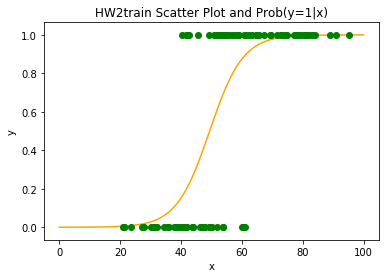

In [5]:
numspace = np.linspace(0, 100, num = 1000)
pred_pro = reg.predict_proba(shape(numspace))
plt.xlabel("x")
plt.ylabel("y")
plt.title("HW2train Scatter Plot and Prob(y=1|x)")
plt.scatter(trainX, trainY, color = 'green', zorder = 2)
plt.plot(numspace, pred_pro[:,1], color = 'orange', zorder = 1)

plt.show()

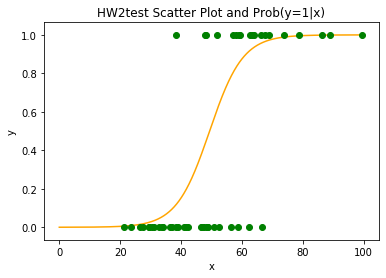

In [6]:
[testY, testX] = readCSV("HW2test.csv")
plt.xlabel("x")
plt.ylabel("y")
plt.title("HW2test Scatter Plot and Prob(y=1|x)")
plt.scatter(testX, testY, color = 'green', zorder = 2)
plt.plot(numspace, pred_pro[:,1], color = 'orange', zorder = 1)

In [18]:
# 5_b
regTest = LogisticRegression(penalty='none', solver = 'lbfgs')
regTest.fit(shape(testX), testY)

# 5_b_1
print('B0= ' + str(regTest.intercept_[0]) + ' B1= ' + str(regTest.coef_[0][0]))

# 5_b_2
print('Score= ' + str(regTest.score(shape(testX), shape(testY))))

B0= -8.339844370137165 B1= 0.15080144730740422
Score= 0.8367346938775511


Train Score= 1.0


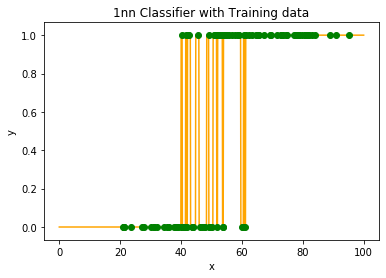

Test Score= 1.0


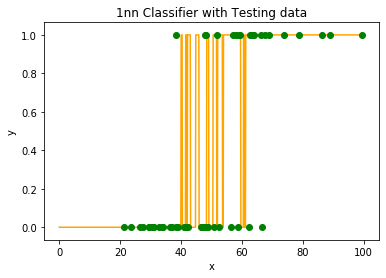

In [33]:
#5C - 1nn
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', algorithm = 'auto')
neigh1.fit(shape(trainX), trainY)
print('Train Score= ' + str(neigh1.score(shape(trainX), shape(trainY))))

neigh_numspace = np.linspace(0, 100, num = 1000)
neigh1_train_predict = neigh1.predict(shape(neigh_numspace))
plt.plot(neigh_numspace, neigh1_train_predict, color = 'orange', zorder =1)
plt.scatter(trainX, trainY, color = 'green', zorder=2)
plt.title("1nn Classifier with Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

neigh1.fit(shape(testX), testY)
print('Test Score= ' + str(neigh1.score(shape(testX), shape(testY))))

plt.scatter(testX, testY, color = 'green', zorder=2)
plt.plot(neigh_numspace, neigh1_train_predict, color = 'orange', zorder =1)
plt.title("1nn Classifier with Testing data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Train Score= 0.898989898989899


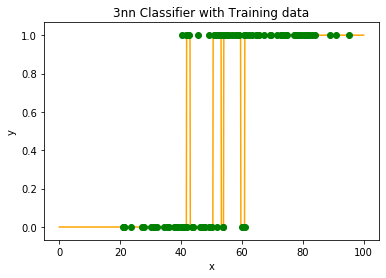

Test Score= 0.8571428571428571


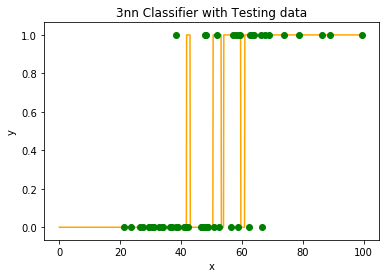

In [41]:
#5C - 3nn
from sklearn.neighbors import KNeighborsClassifier
neigh3 = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', algorithm = 'auto')
neigh3.fit(shape(trainX), trainY)
print('Train Score= ' + str(neigh3.score(shape(trainX), shape(trainY))))

neigh_numspace = np.linspace(0, 100, num = 1000)
neigh3_train_predict = neigh3.predict(shape(neigh_numspace))
plt.plot(neigh_numspace, neigh3_train_predict, color = 'orange', zorder =1)
plt.scatter(trainX, trainY, color = 'green', zorder=2)
plt.title("3nn Classifier with Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

neigh3.fit(shape(testX), testY)
print('Test Score= ' + str(neigh3.score(shape(testX), shape(testY))))

plt.scatter(testX, testY, color = 'green', zorder=2)
plt.plot(neigh_numspace, neigh3_train_predict, color = 'orange', zorder =1)
plt.title("3nn Classifier with Testing data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Train Score= 0.8585858585858586


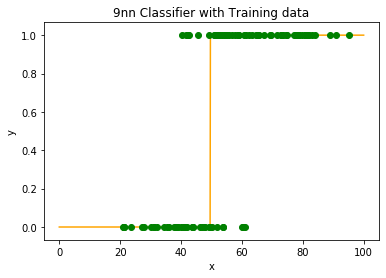

Test Score= 0.8367346938775511


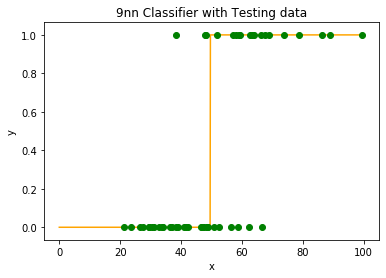

In [42]:
#5C - 9nn
from sklearn.neighbors import KNeighborsClassifier
neigh9 = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', algorithm = 'auto')
neigh9.fit(shape(trainX), trainY)
print('Train Score= ' + str(neigh9.score(shape(trainX), shape(trainY))))

neigh_numspace = np.linspace(0, 100, num = 1000)
neigh9_train_predict = neigh9.predict(shape(neigh_numspace))
plt.plot(neigh_numspace, neigh9_train_predict, color = 'orange', zorder =1)
plt.scatter(trainX, trainY, color = 'green', zorder=2)
plt.title("9nn Classifier with Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

neigh9.fit(shape(testX), testY)
print('Test Score= ' + str(neigh9.score(shape(testX), shape(testY))))

plt.scatter(testX, testY, color = 'green', zorder=2)
plt.plot(neigh_numspace, neigh9_train_predict, color = 'orange', zorder =1)
plt.title("9nn Classifier with Testing data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

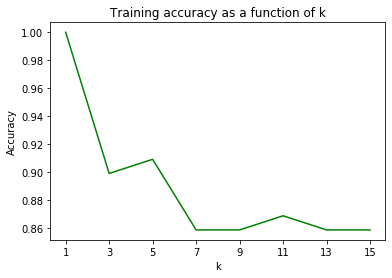

In [54]:
odds = [1,3,5,7,9,11,13,15]
odds_train_scores = []

for i in odds:
    neigh_train_odd = KNeighborsClassifier(n_neighbors=i, weights = 'uniform', algorithm = 'auto')
    neigh_train_odd.fit(shape(trainX), trainY)
    #print('Train Score= ' + str(neigh_train_odd.score(shape(trainX), shape(trainY))))
    odds_train_scores.append(neigh_train_odd.score(shape(trainX), shape(trainY)))

plt.plot(odds, odds_train_scores, color = 'green')
plt.title('Training accuracy as a function of k')
plt.xlabel('k')
plt.xticks(odds)
plt.ylabel('Accuracy')
plt.show()

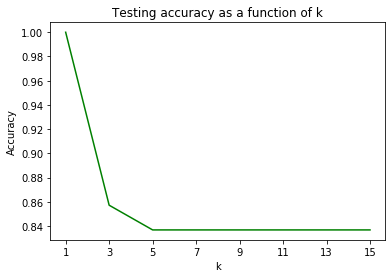

In [55]:
odds = [1,3,5,7,9,11,13,15]
odds_test_scores = []

for i in odds:
    neigh_test_odd = KNeighborsClassifier(n_neighbors=i, weights = 'uniform', algorithm = 'auto')
    neigh_test_odd.fit(shape(testX), testY)
    #print('Train Score= ' + str(neigh_train_odd.score(shape(trainX), shape(trainY))))
    odds_test_scores.append(neigh_test_odd.score(shape(testX), shape(testY)))

plt.plot(odds, odds_test_scores, color = 'green')
plt.title('Testing accuracy as a function of k')
plt.xlabel('k')
plt.xticks(odds)
plt.ylabel('Accuracy')
plt.show()